# Task 1: Prediction using Supervised Machine Learning

**OBJECTIVE**:-

In this task,we have to predict the percentage of marks that a student is expected to score based on the number of hours they studied.This task involves two variables.

For that we will be using one of the fundamental statistical and machine learning technique which is Simple Linear Regression.Linear regression uses the relationship between the data-points to draw a straight line through all them.This line can be used to predict future values.

In [ ]:
# importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Dataset
xu= pd.read_csv("http://bit.ly/w-data")
xu

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#The method shape returns the Row and Column of the given dataset.
xu.shape

(25, 2)

In [ ]:
#Statistical Information
xu.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
# Information About DataFrame
xu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#Evaluating For Missing Values

In [ ]:
xu.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


# Data Visualization

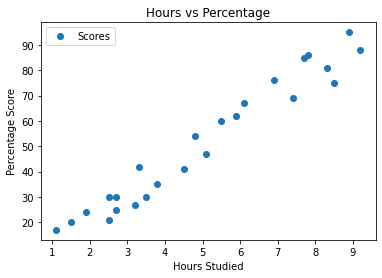

In [ ]:
xu.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

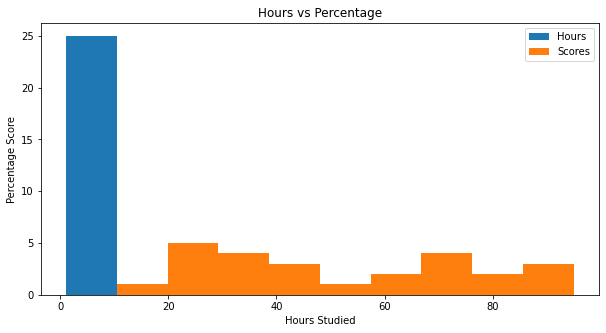

In [ ]:
xu.plot(kind='hist',figsize=(10,5))
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

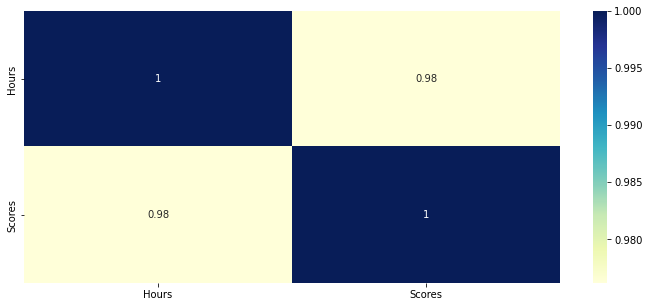

In [ ]:
plt.subplots(figsize=(12, 5)) 
sns.heatmap(xu.corr(),annot=True,cmap="YlGnBu",annot_kws={'fontsize':10})
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Preparing Data For Modelling

In [ ]:
x=xu.iloc[:, :-1].values
y=xu.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [ ]:
#x's training data
X_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [ ]:
#x's test data
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [ ]:
#y's training data
Y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [ ]:
#y's test data
Y_test

array([20, 27, 69, 30, 62])

#Training the Algorithm

**Linear** **Regression** **Model** 

In [ ]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training Complete.")

Training Complete.


In [ ]:
#The attribute 'coef_' computes the coefficients of the features in the decision function
regressor.coef_

array([9.91065648])

In [ ]:
#The attribute 'intercept_' is to represents the constant(bias), added to the decision function.
regressor.intercept_

2.018160041434662

In [ ]:
#Checking the percentage of correct predictions for the test data.
print("Accuracy : ",regressor.score(x_test, y_test)*100)

Accuracy :  94.54906892105353


In [ ]:
line = regressor.coef_*x+regressor.intercept_

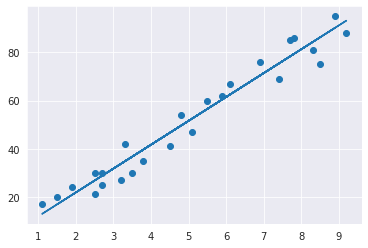

In [ ]:
#Plotting the regression Line
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

In [ ]:
#Predicting the scores using our trained algorithm
#The predict() method will predict the label of a new set of data(given a trained model).
y_prediction = regressor.predict(X_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Actual Value Vs Predicted Value
xu = pd.DataFrame({'Actual': Y_test, 'Predicted': y_prediction})  
xu

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


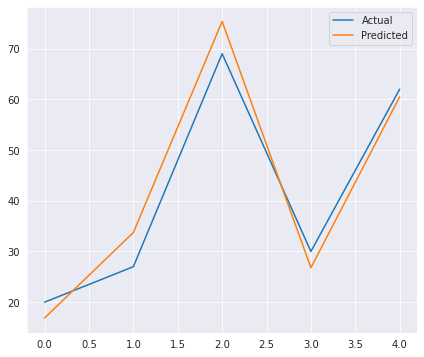

In [ ]:
sns.set_style('darkgrid')
xu.plot(kind='line',figsize=(7,6))


#What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
hours = 9.25
predicted = regressor.coef_*hours+regressor.intercept_
print("No of Hours = ",hours)
print("Predicted Score = ",predicted[0])
y_predict=regressor.predict([[hours]])
print("Predicted Score if a student studied for 9.25 hours per day:",y_predict[0])

No of Hours =  9.25
Predicted Score =  93.69173248737539
Predicted Score if a student studied for 9.25 hours per day: 93.69173248737539


#Model Evaluation
Our final step is to evaluate the performance of trained model. This step is to check how well is the model working with this dataset.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_prediction,y_test)
mse=mean_squared_error(y_prediction,y_test)
r_score=r2_score(y_prediction,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Squared: 0.9546785947197246




---



*Created By- Sangram Pramanik*   











---

